# Le Titanic

<img src="https://www.scienceabc.com/wp-content/uploads/2016/04/titanic-jack-and-rose-plank-scene.webp">

## Lecture des données

In [1]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

In [2]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
# SeaBorn : librairie de graphiques avancés
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Lecture des données d'apprentissage et de test
titanic = pd.read_csv("titanic.csv")

In [4]:
titanic.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                          homedest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

## Interprétation des paramètres

## Exercice : tester différentes visualisations sur le dataset

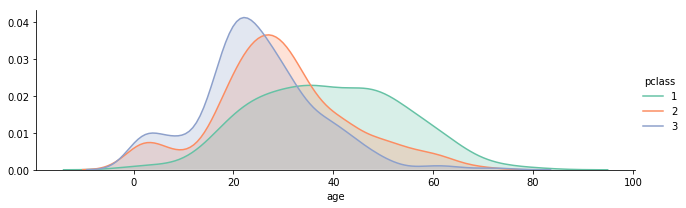

In [5]:
fig = sns.FacetGrid(titanic, hue="pclass", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "age", shade=True)
fig.add_legend()

## Conditionnement des données

In [6]:
titanic.count()

pclass      1309
survived    1309
name        1309
sex         1309
age         1046
sibsp       1309
parch       1309
ticket      1309
fare        1308
cabin        295
embarked    1307
boat         486
body         121
homedest     745
dtype: int64

In [7]:
np.nan

nan

In [8]:
# On élimine les colonnes non pertinentes pour la prédiction
titanic = titanic.drop(['name', 'ticket', 'cabin','boat','body','homedest'], axis=1)

### Données manquantes

In [9]:
titanic.count()

pclass      1309
survived    1309
sex         1309
age         1046
sibsp       1309
parch       1309
fare        1308
embarked    1307
dtype: int64

On voit qu'il manque des données, en particulier pour la colonne *'age'*  
Il existe plusieurs approches pour compléter les données manquantes :  
- **suppression** des données manquantes (par exemple avec la fonction *dropna*). C'est une méthode simple, mais qui élimine de l'information
- **remplacement** des données manquantes. Par exemple, on pourrait remplacer les informations manquantes pour l'âge par la moyenne de la colonne (mais on introduit un biais sur cette valeur), ou par un nombre aléatoire généré par une loi normale de même moyenne et variance ...
- **estimation** des paramètres manquants avec une méthode de prédiction (par exemple avec une régression)

La fonction *fillna* permet de compléter simplement les paramètres manquants. L'option *method='pad'* permet d'utiliser la précédente valeur non manquante :

In [10]:
titanic = titanic.fillna(method='pad')

In [11]:
titanic.count()

pclass      1309
survived    1309
sex         1309
age         1309
sibsp       1309
parch       1309
fare        1309
embarked    1309
dtype: int64

On a bien complété les valeurs manquantes

(array([ 25.,  12.,   7.,  10.,   6.,   6.,   4.,   6.,  14.,   4.,   5.,
          4.,   5.,   8.,  18.,  27.,  27.,  42.,  42.,  24.,  48.,  64.,
         30.,  59.,  53.,  36.,  44.,  38.,  39.,  46.,  31.,  32.,  39.,
         24.,  33.,  36.,  14.,  16.,  28.,  18.,  17.,  21.,  11.,  17.,
         33.,  10.,  19.,  20.,  12.,  15.,   8.,   7.,   4.,  10.,   9.,
          6.,   8.,   6.,   3.,   7.,  12.,   5.,   5.,   5.,   3.,   2.,
          1.,   0.,   0.,   2.,   3.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   2.]),
 array([  0.1667    ,   1.16461625,   2.1625325 ,   3.16044875,
          4.158365  ,   5.15628125,   6.1541975 ,   7.15211375,
          8.15003   ,   9.14794625,  10.1458625 ,  11.14377875,
         12.141695  ,  13.13961125,  14.1375275 ,  15.13544375,
         16.13336   ,  17.13127625,  18.1291925 ,  19.12710875,
         20.125025  ,  21.12294125,  22.1208575 ,  23.11877375,
         24.11669   ,  25.11460625,  26.1125225 ,  27.11043875,
      

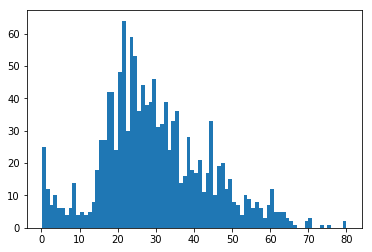

In [12]:
plt.hist(titanic.age, bins=80)

La distribution des âges n'est pas significativement modifiée ...

### Mise à l'échelle des données quantitatives

In [13]:
titanic[['age','fare']].describe()

age         fare
count  1309.000000  1309.000000
mean     30.027820    33.276193
std      14.064854    51.743584
min       0.166700     0.000000
25%      21.000000     7.895800
50%      28.000000    14.454200
75%      39.000000    31.275000
max      80.000000   512.329200

In [14]:
titanic.age = titanic.age.astype(float)
titanic.fare = titanic.fare.astype(float)

(array([  25.,   19.,   10.,   12.,   10.,   14.,    9.,    4.,   25.,
          33.,   27.,   84.,   25.,  112.,   88.,   53.,   80.,   42.,
          85.,   59.,   39.,   57.,   38.,   28.,   46.,   17.,   32.,
          17.,   43.,   39.,   12.,   23.,    7.,   14.,   15.,    8.,
           9.,    8.,   16.,   10.,    3.,    3.,    0.,    2.,    3.,
           0.,    1.,    1.,    0.,    2.]),
 array([  0.1667  ,   1.763366,   3.360032,   4.956698,   6.553364,
          8.15003 ,   9.746696,  11.343362,  12.940028,  14.536694,
         16.13336 ,  17.730026,  19.326692,  20.923358,  22.520024,
         24.11669 ,  25.713356,  27.310022,  28.906688,  30.503354,
         32.10002 ,  33.696686,  35.293352,  36.890018,  38.486684,
         40.08335 ,  41.680016,  43.276682,  44.873348,  46.470014,
         48.06668 ,  49.663346,  51.260012,  52.856678,  54.453344,
         56.05001 ,  57.646676,  59.243342,  60.840008,  62.436674,
         64.03334 ,  65.630006,  67.226672,  68.823338, 

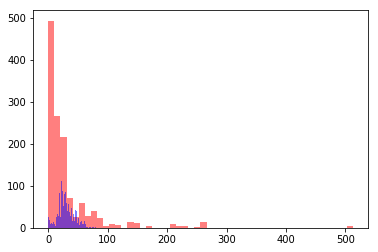

In [15]:
plt.hist(titanic.fare, bins=50, color='red', alpha=0.5)
plt.hist(titanic.age, bins=50, color='blue', alpha=0.5)

On voit qu'il y a une forte différente de distribution entre les deux séries.  
Certains algorithmes demandent une distribution normalisée. Pour une discussion détaillée sur ce sujet, cf par exemple :  
http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html  
http://scikit-learn.org/stable/modules/preprocessing.html

La librairie *sklearn* comporte une librairie de prétraitement des données

In [16]:
from sklearn import preprocessing

In [17]:
minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler = preprocessing.StandardScaler()
titanic[['age', 'fare']] = minmax.fit_transform(titanic[['age', 'fare']])
titanic[['age', 'fare']] = scaler.fit_transform(titanic[['age', 'fare']])

(array([  25.,   19.,   10.,   12.,   10.,   14.,    9.,    4.,   25.,
          33.,   27.,   84.,   25.,  112.,   88.,   53.,   80.,   42.,
          85.,   59.,   39.,   57.,   38.,   28.,   46.,   17.,   32.,
          17.,   43.,   39.,   12.,   23.,    7.,   14.,   15.,    8.,
           9.,    8.,   16.,   10.,    3.,    3.,    0.,    2.,    3.,
           0.,    1.,    1.,    0.,    2.]),
 array([-2.1239135 , -2.01034842, -1.89678334, -1.78321827, -1.66965319,
        -1.55608811, -1.44252303, -1.32895795, -1.21539287, -1.10182779,
        -0.98826272, -0.87469764, -0.76113256, -0.64756748, -0.5340024 ,
        -0.42043732, -0.30687224, -0.19330717, -0.07974209,  0.03382299,
         0.14738807,  0.26095315,  0.37451823,  0.48808331,  0.60164838,
         0.71521346,  0.82877854,  0.94234362,  1.0559087 ,  1.16947378,
         1.28303885,  1.39660393,  1.51016901,  1.62373409,  1.73729917,
         1.85086425,  1.96442933,  2.0779944 ,  2.19155948,  2.30512456,
         2.41868

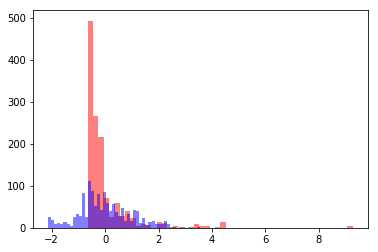

In [18]:
plt.hist(titanic.fare, bins=50, color='red', alpha=0.5)
plt.hist(titanic.age, bins=50, color='blue', alpha=0.5)

### Encodage binaire des données qualitatives (*one hot encoding*)

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null object
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
embarked    1309 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


La plupart des algorithmes ont besoin de données numériques, et n'acceptent pas les chaînes de caractères :

In [20]:
titanic.sex = titanic.sex.map({"male":0, "female":1})

On utilise la fonction *get_dummies* de Pandas pour transformer les colonnes multimodales (par exemple 'embarked') en plusieurs colonnes binaires (par exemple 'embarked_C' dont les valeurs sont 1 si le passager a embarqué à Cherbourg et 0 sinon) :

In [21]:
titanic = pd.get_dummies(data=titanic, columns=['pclass', 'embarked'])

In [22]:
titanic.head()

survived  sex       age  sibsp  parch      fare  pclass_1  pclass_2  \
0         1    1 -0.073105      0      0  3.442540         1         0   
1         1    0 -2.070569      1      2  2.286641         1         0   
2         0    1 -1.993518      1      2  2.286641         1         0   
3         0    0 -0.001979      1      2  2.286641         1         0   
4         0    1 -0.357611      1      2  2.286641         1         0   

   pclass_3  embarked_C  embarked_Q  embarked_S  
0         0           0           0           1  
1         0           0           0           1  
2         0           0           0           1  
3         0           0           0           1  
4         0           0           0           1

## Création des jeux d'apprentissage et de test

In [23]:
X = titanic.drop(['survived'], axis=1)
y = titanic.survived

On sépare le dataset en deux parties :
- un ensemble d'apprentissage (entre 70% et 90% des données), qui va permettre d'entraîner le modèle
- un ensemble de test (entre 10% et 30% des données), qui va permettre d'estimer la pertinence de la prédiction

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)

(1047, 11)
(262, 11)


## Régression logistique

cf par exemple :  
https://fr.wikipedia.org/wiki/R%C3%A9gression_logistique  
https://eric.univ-lyon2.fr/~ricco/cours/cours_regression_logistique.html

In [26]:
from sklearn.linear_model import LogisticRegression

On entraîne le modèle de régression logistique avec *fit* :

In [27]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

On peut prédire les valeurs sur l'ensemble de test avec le modèle entraîné :

In [28]:
y_lr = lr.predict(X_test)

## Mesures de performance

In [29]:
# Importation des méthodes de mesure de performances
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

En comparant les valeurs prédites et les valeurs réelles, on a plusieurs possibilités :
- *Vrais positifs* (VP ou TP) : on prédit "oui" et la valeur attendue est "oui"
- *Vrais négatifs* (VN ou TN) : on prédit "non" et la valeur attendue est "non"
- *Faux positifs* (FP) : on prédit "oui" et la valeur attendue est "non"
- *Faux négatifs* (FN) : on prédit "non" et la valeur attendue est "oui"

Par exemple, si veut prédire le décès, le nombre de vrais positifs est le nombre de fois où on a prédit 0 pour des passagers effectivement morts sur le Titanic (*survived = 0*)

In [30]:
print(confusion_matrix(y_test,y_lr))

[[141  15]
 [ 32  74]]


La **matrice de confusion** permet de compter les vrais positifs, faux positifs, ...

<img src="https://i.stack.imgur.com/gKyb9.png">

La pertinence (ou *accuracy*) mesure le nombre de bonnes prédictions sur le nombre total d'observations

In [31]:
print(accuracy_score(y_test,y_lr))

0.820610687023


Néanmoins cette mesure peut être faussée dans certains cas, en particulier si le nombre de 0 et de 1 est déséquilibré.
On a donc d'autres estimateurs :
- la **précision** est le nombre de prédictions positives correctes sur le nombre total de prédictions positives : *precision = VP/(VP+FP)*
- la **sensibilité** (*recall*) est le nombre de prédictions positives sur le nombre effectif de "oui" : *recall = VP(VP+FN)*
- le **score F1** est la moyenne pondérée de la précision et de la sensibilité : *f1-score = 2xprecisionxrecall/(precision+recall)*

In [32]:
print(classification_report(y_test, y_lr))

             precision    recall  f1-score   support

          0       0.82      0.90      0.86       156
          1       0.83      0.70      0.76       106

avg / total       0.82      0.82      0.82       262



*predict_proba* donne un tableau de couples de probabilités : *[probabilité de prédiction 0, probabilité de prédiction 1]*

In [33]:
probas = lr.predict_proba(X_test)

On met les probabilités de prédiction de la valeur 1 dans un dataframe, avec les valeurs effectives, pour faciliter la visualisation :

In [34]:
dfprobas = pd.DataFrame(probas[:,1],columns=['proba_1'])
dfprobas['y'] = y_test

On affiche l'histogramme des probabilités, avec la classe réelle, ce qui donne une idée des erreurs commises :

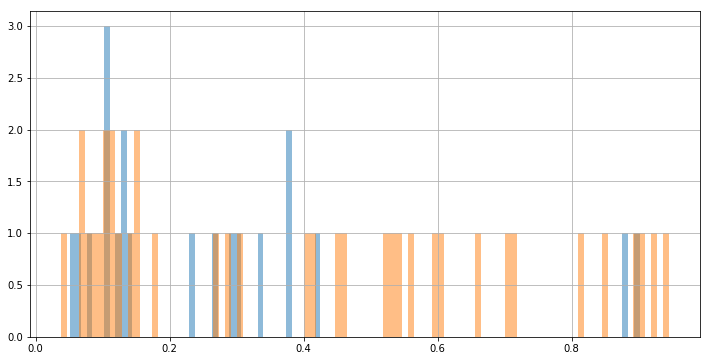

In [35]:
dfprobas.proba_1[dfprobas.y==0].hist(bins=100, figsize=(12,6), alpha=0.5)
dfprobas.proba_1[dfprobas.y==1].hist(bins=100, figsize=(12,6), alpha=0.5)

La **courbe ROC** (Receiving Operator Characteristic) représente le taux de vrais positifs par rapport aux taux de faux positifs.  
La mesure de l'aire sous la courbe **AUC** (Area Under Curve) est un bon indicateur de performance  
Pour plus de détails : http://www.xavierdupre.fr/app/mlstatpy/helpsphinx/c_metric/roc.html

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probas[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.86341920658


Text(0.5,0,'False Positive Rate')

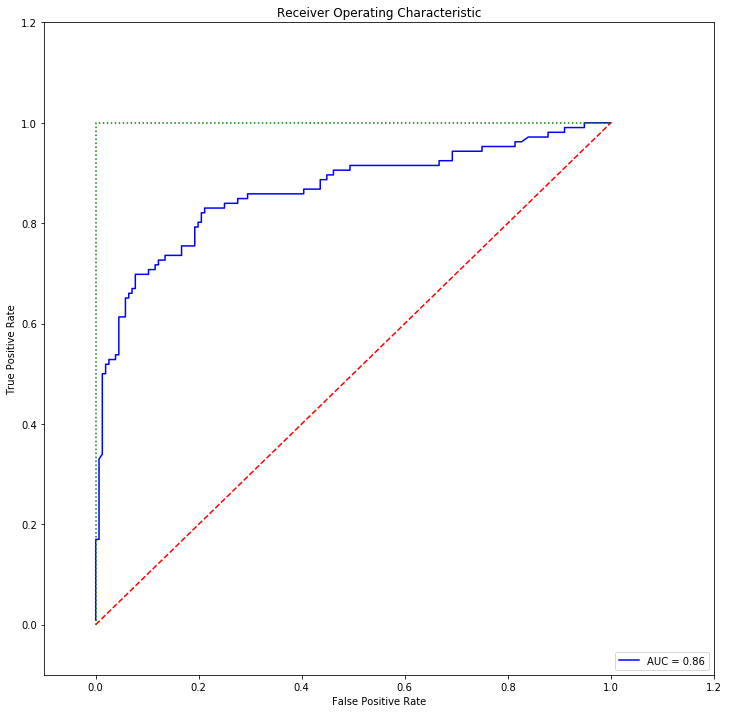

In [37]:
plt.figure(figsize=(12,12))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')        # plus mauvaise courbe
plt.plot([0,0,1],[0,1,1],'g:')     # meilleure courbe
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Ajustement des hyperparamètres (Random Forests)

On teste les forêts aléatoires :

In [38]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [39]:
print(classification_report(y_test, y_rf))

             precision    recall  f1-score   support

          0       0.78      0.87      0.82       156
          1       0.77      0.65      0.70       106

avg / total       0.78      0.78      0.77       262



In [40]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[135  21]
 [ 37  69]]


Parmi les hyperparamètres de l'algorithme qui peuvent avoir un impact sur les performances, on a :
- **n_estimators** : le nombre d'arbres de décision de la forêt aléatoire
- **min_samples_leaf** : le nombre d'échantillons minimum dans une feuille de chaque arbre
- **max_features** : le nombre de caractéristiques à prendre en compte lors de chaque split

Pour chaque algorithme de *sklearn*, on peut trouver la liste des paramètres dans la documentation, avec des exemples :  
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  

In [41]:
rf1 = ensemble.RandomForestClassifier(n_estimators=500, min_samples_leaf=20, max_features=10)
rf1.fit(X_train, y_train)
y_rf1 = rf.predict(X_test)
print(classification_report(y_test, y_rf1))

             precision    recall  f1-score   support

          0       0.78      0.87      0.82       156
          1       0.77      0.65      0.70       106

avg / total       0.78      0.78      0.77       262



*validation_curve* permet de tracer la courbe du score sur un ensemble d'apprentissage et sur un ensemble de test (*cross validation*), en faisant varier un paramètre, par exemple *n_estimators* :

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


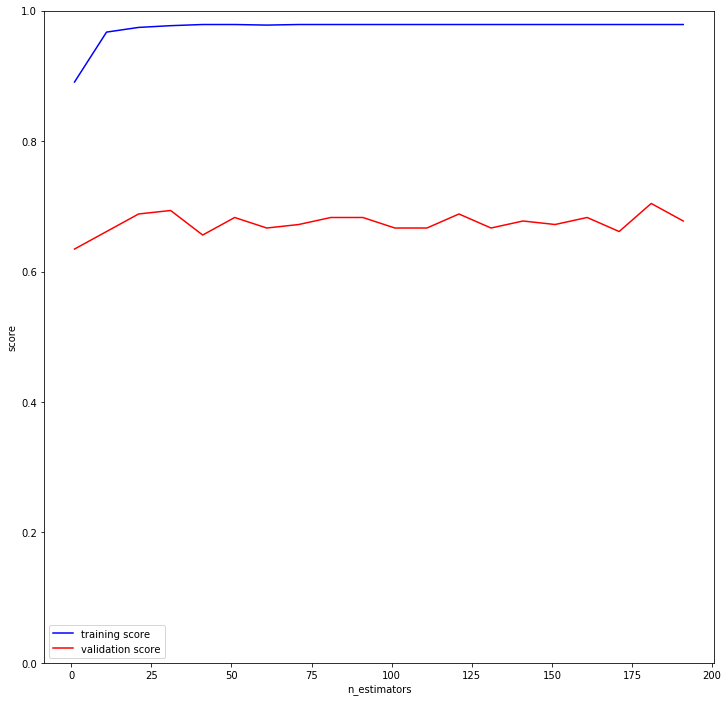

In [42]:
from sklearn.learning_curve import validation_curve
params = np.arange(1, 200,step=10)
train_score, val_score = validation_curve(rf, X, y, 'n_estimators', params, cv=7)
plt.figure(figsize=(12,12))
plt.plot(params, np.median(train_score, 1), color='blue', label='training score')
plt.plot(params, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('score');

**Exercice** : tracer les coubres de validation pour les paramètres *min_samples_leaf* et *max_features* (attention pour ce dernier, le nombre max est le nombre de caractéristiques / colonnes du tableau)

La méthode *GridSearchCV* permet de tester plusieurs combinaisons de paramètres (listés dans une grille de paramètres) et de sélectionner celle qui donne la meilleure pertinence

In [43]:
from sklearn import model_selection

In [45]:
param_grid = {
              'n_estimators': [10, 100, 500],
              'min_samples_leaf': [1, 3, 5]
             }
estimator = ensemble.RandomForestClassifier()
rf_gs = model_selection.GridSearchCV(estimator, param_grid)

Ici on a choisi des valeurs pour le nombres d'arbres dans la forêt aléatoire (*'n_estimators'*) et le nombre minimum d'échantillons pour une feuille. On pourrait tester d'autres valeurs, et d'autres paramètres, cf :  
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

On lance l'entrainement :

In [46]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 500], 'min_samples_leaf': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

On peut voir les paramètres sélectionnés et le score :

In [47]:
print(rf_gs.best_params_)

{'min_samples_leaf': 3, 'n_estimators': 100}


On sélectionne le meilleur estimateur :

In [48]:
rf2 = rf_gs.best_estimator_

In [49]:
y_rf2 = rf2.predict(X_test)

In [50]:
print(classification_report(y_test, y_rf2))

             precision    recall  f1-score   support

          0       0.78      0.92      0.84       156
          1       0.83      0.61      0.71       106

avg / total       0.80      0.79      0.79       262



On a amélioré la performance du modèle

### Importance des caractéristiques

L'attribut *feature_importances_* renvoie un tableau du poids de chaque caractéristique dans la décision :

In [51]:
importances = rf2.feature_importances_
indices = np.argsort(importances)

On peut visualiser ces degrés d'importance avec un graphique à barres par exemple :

Text(0.5,1,'Importance des caracteristiques')

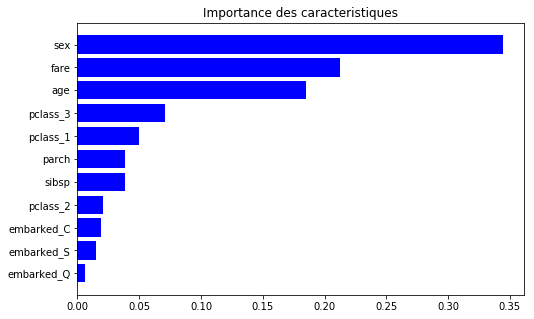

In [52]:
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.title('Importance des caracteristiques')

## Exercice : appliquer la démarche avec la méthode Support Vector Classifier

## Exercice : explorer d'autres méthodes de classification

<img src = "http://scikit-learn.org/0.16/_static/ml_map.png">

http://scikit-learn.org/0.16/tutorial/machine_learning_map/index.html

## Exercice : appliquer les méthodes sur le dataset *Indian Diabete*